# 

# Parking forecasting with Scikit-learn and MLPRegression for Zone 1
Developed as part of European Union Horizon 2020 programme funded SCALE-UP project (grant agreement no. 955332).

## Import libraries, functions and constants

In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from utils import (
    compare_test_with_predicition,
    fit_model,
    get_filtered_merged_data,
    get_pipeline,
    predict,
    draw_results,
    print_results,
    BASE,
    MINUS_10,
    MINUS_20,
    ZERO,
    PLUS_10,
    PLUS_20,
    DRY_WEATHER,
    SEASONABILITY_COLUMNS,
    RAIN,
    RAIN_BOOL,
    TEMPERATURE,
    YEAR,
    RAIN_VALUE,
)



## Load and prepare data

In [2]:
df_base, df_rain_train, df_rain_bool_train, df_temperature_train = get_filtered_merged_data("../data/parkings_small.csv")

Found 718955 parkings in zone


## Create pipelines and train models

#

mean squared error for model base: 3625.3147558819405
mean squared error for model rain: 3526.6714837038853
mean squared error for model temperature: 3182.002967397818
mean squared error for model rain boolean: 3527.016559553471


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hour', 'month',
                                                   'dayofweek']),
                                                 ('Standard', StandardScaler(),
                                                  ['year', 'rain'])])),
                ('regressor',
                 MLPRegressor(alpha=0.1, early_stopping=True,
                              hidden_layer_sizes=(32, 164), max_iter=2000,
                              random_state=42))])

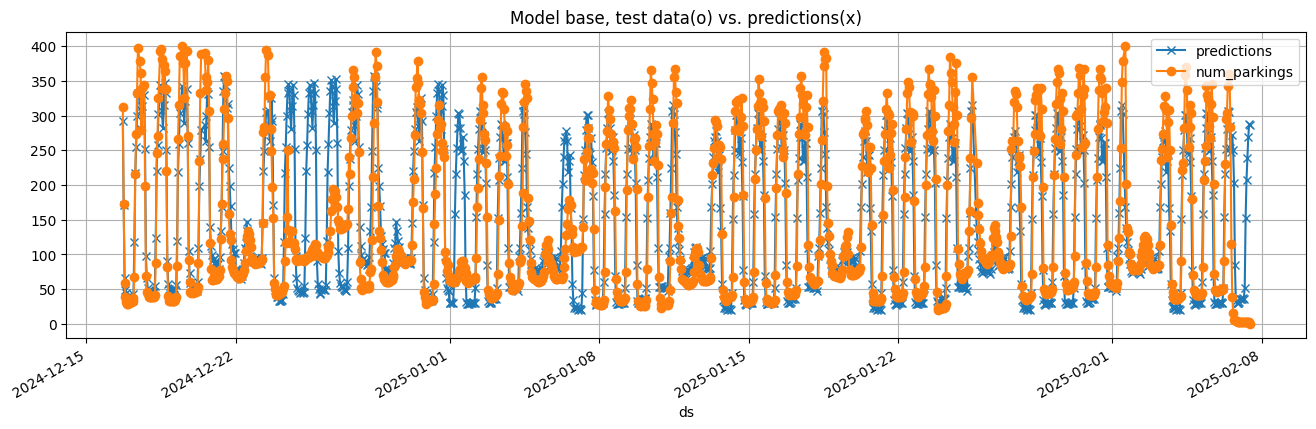

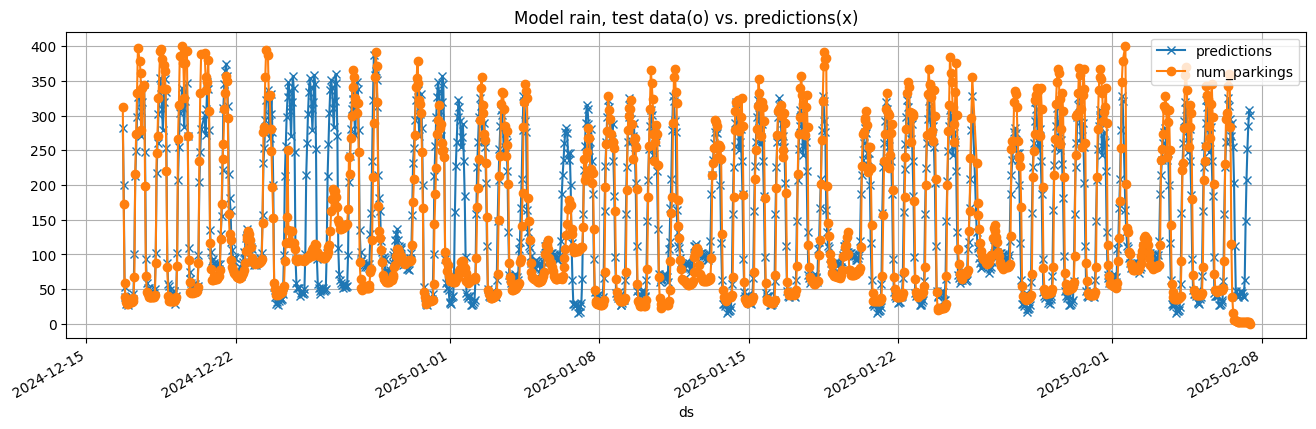

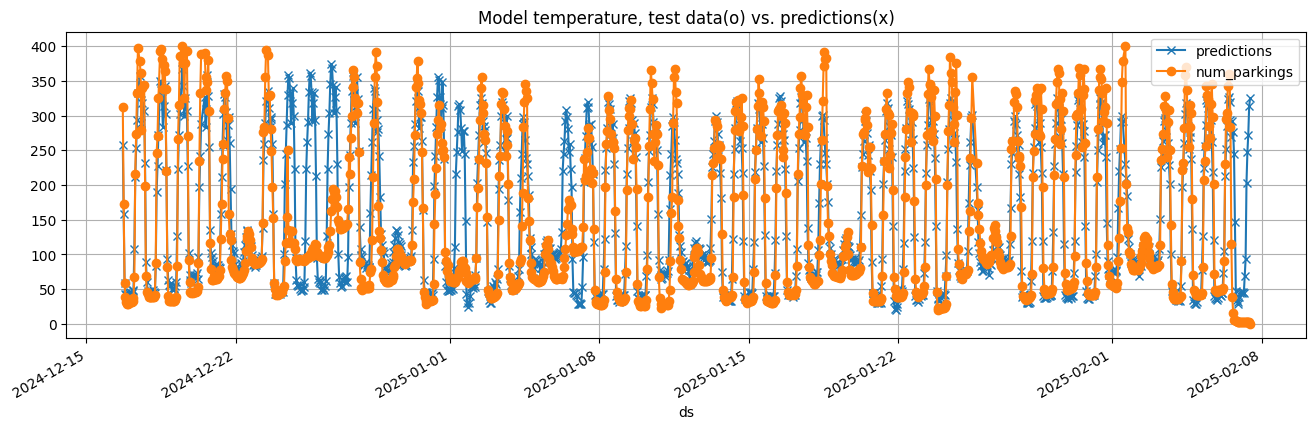

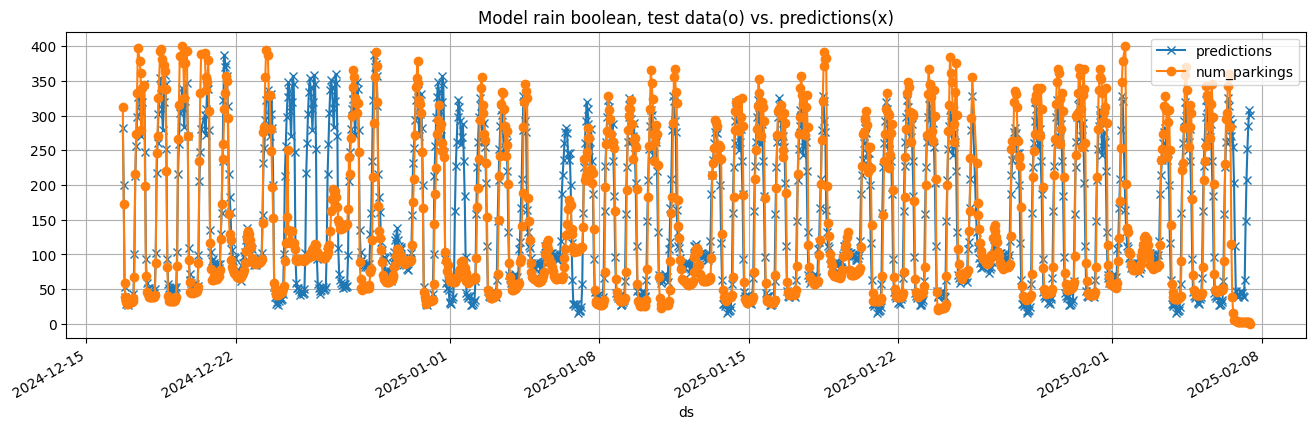

In [3]:
model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",         
    solver="adam",
    learning_rate="constant",               
    max_iter=500,              
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline = get_pipeline(model, standard_columns=[YEAR])
X_test, y_test = fit_model(pipeline, df_base, SEASONABILITY_COLUMNS)
compare_test_with_predicition(pipeline, X_test, y_test, model_name=BASE)

model = MLPRegressor(
    hidden_layer_sizes=(32,164),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain, df_rain_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN)

model = MLPRegressor(
    hidden_layer_sizes=(32, 16, 4),     
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_temperature = get_pipeline(model, standard_columns=[TEMPERATURE, YEAR])
X_test, y_test = fit_model(pipeline_temperature, df_temperature_train, SEASONABILITY_COLUMNS+[TEMPERATURE])
compare_test_with_predicition(pipeline_temperature, X_test, y_test, model_name=TEMPERATURE)

model = MLPRegressor(
    hidden_layer_sizes=(32,16,4),  
    activation="relu",          
    solver="adam",
    learning_rate="constant",             
    max_iter=2000,               
    random_state=42,
    alpha=0.1,
    early_stopping=True,
)
pipeline_rain_bool = get_pipeline(model, standard_columns=[YEAR, RAIN])
X_test, y_test = fit_model(pipeline_rain_bool, df_rain_bool_train, SEASONABILITY_COLUMNS+[RAIN])
compare_test_with_predicition(pipeline_rain, X_test, y_test, model_name=RAIN_BOOL)

## Make predictions

Forecast period: 2025-02-07 11:00:00 - 2025-03-09 11:00:00
Base forecast for parkings: 96380.
Forecast for parkings in rain: 94812.  Diff to base -1568 (-1.63%)
Forecast for parkings in rain boolean: 119945.  Diff to base 23565 (24.45%)
Forecast for parkings in dry weather: 102448.  Diff to base 6068 (6.3%)
Forecast for parkings in -20 degrees temperature: 107903.  Diff to base 11523 (11.96%)
Forecast for parkings in -10 degrees temperature: 105316.  Diff to base 8936 (9.27%)
Forecast for parkings in 0 degrees temperature: 107215.  Diff to base 10835 (11.24%)
Forecast for parkings in 10 degrees temperature: 108618.  Diff to base 12238 (12.7%)
Forecast for parkings in 20 degrees temperature: 110497.  Diff to base 14117 (14.65%)


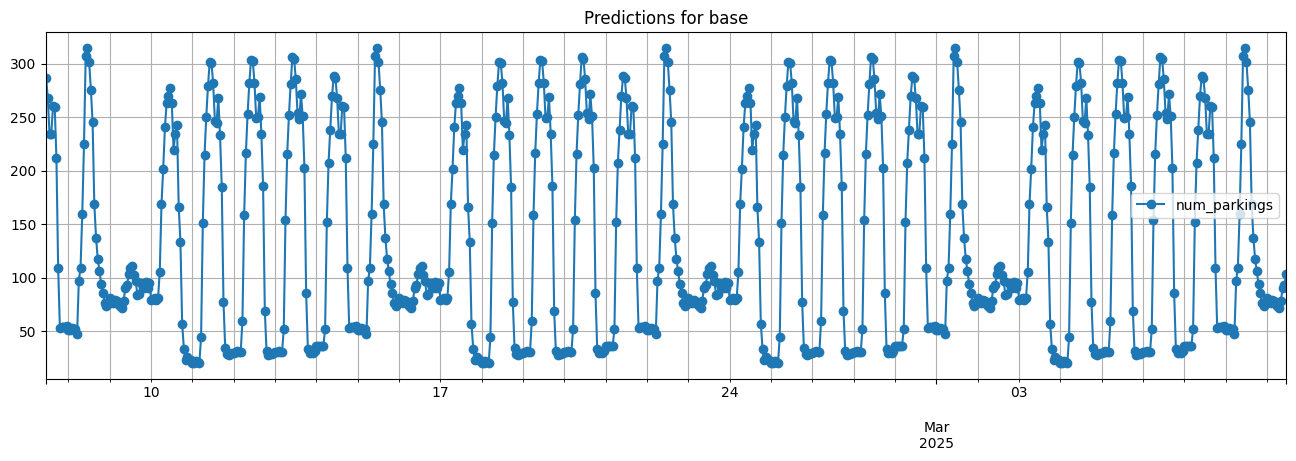

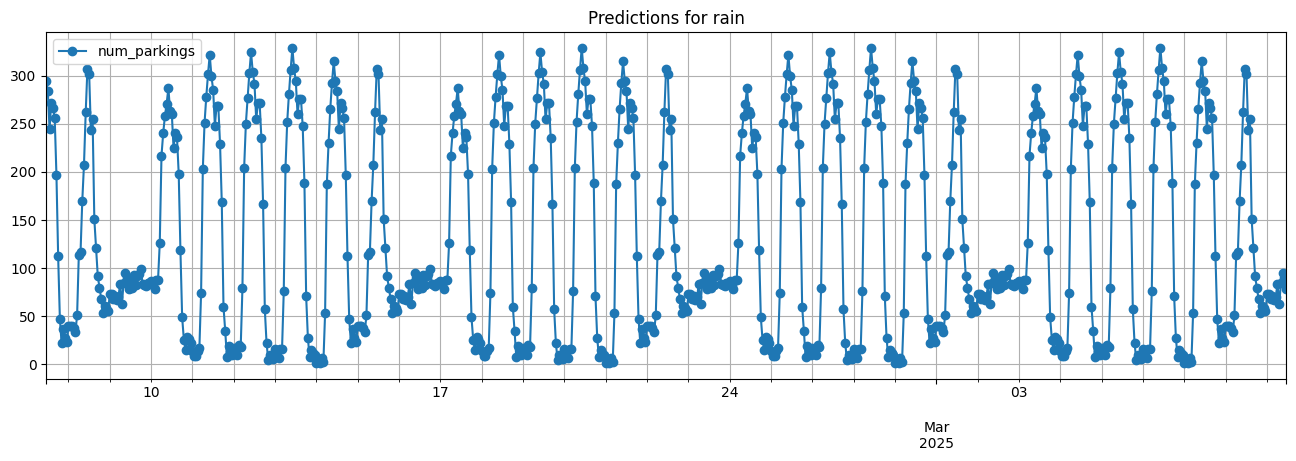

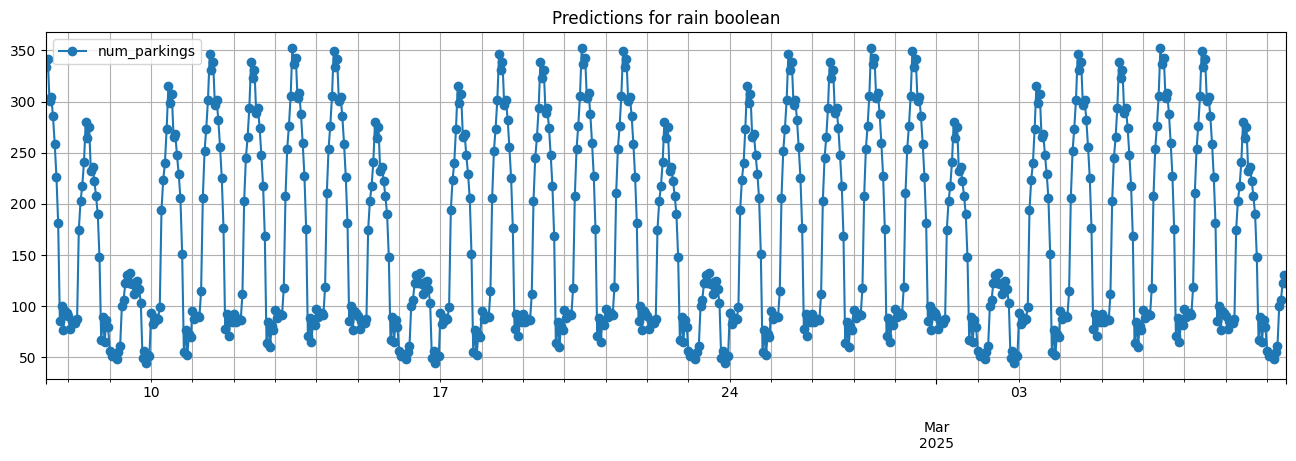

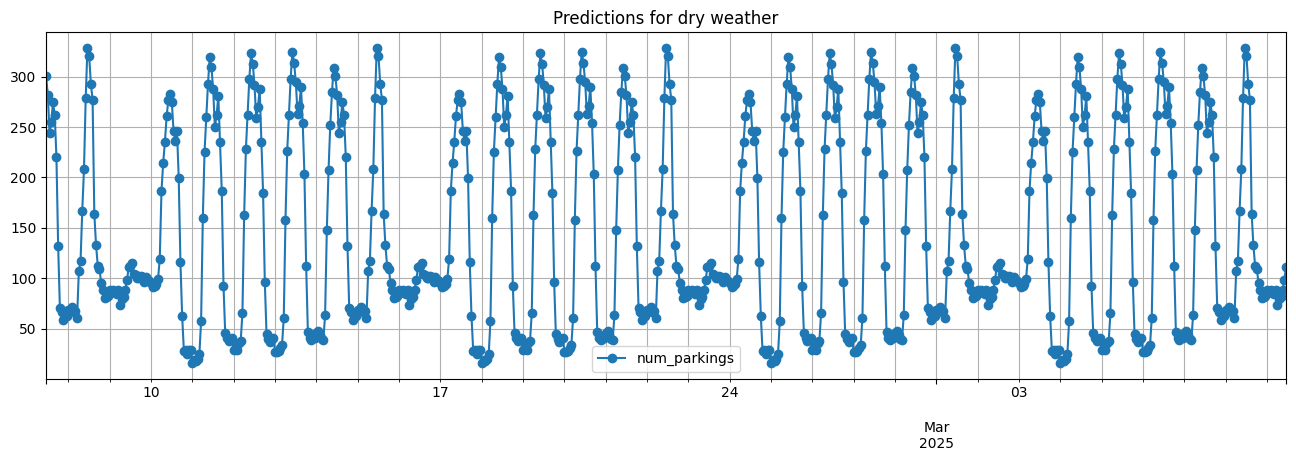

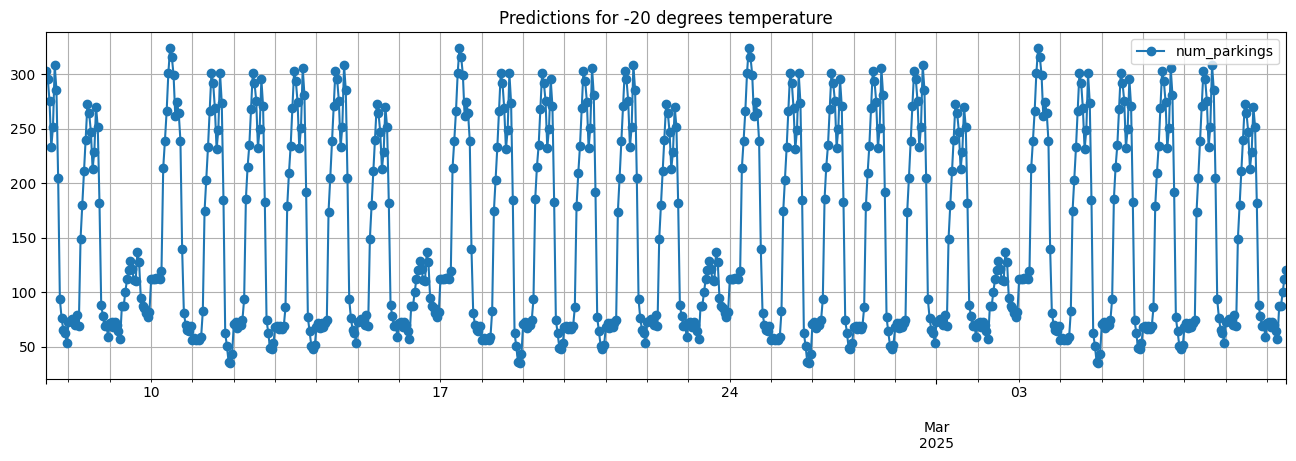

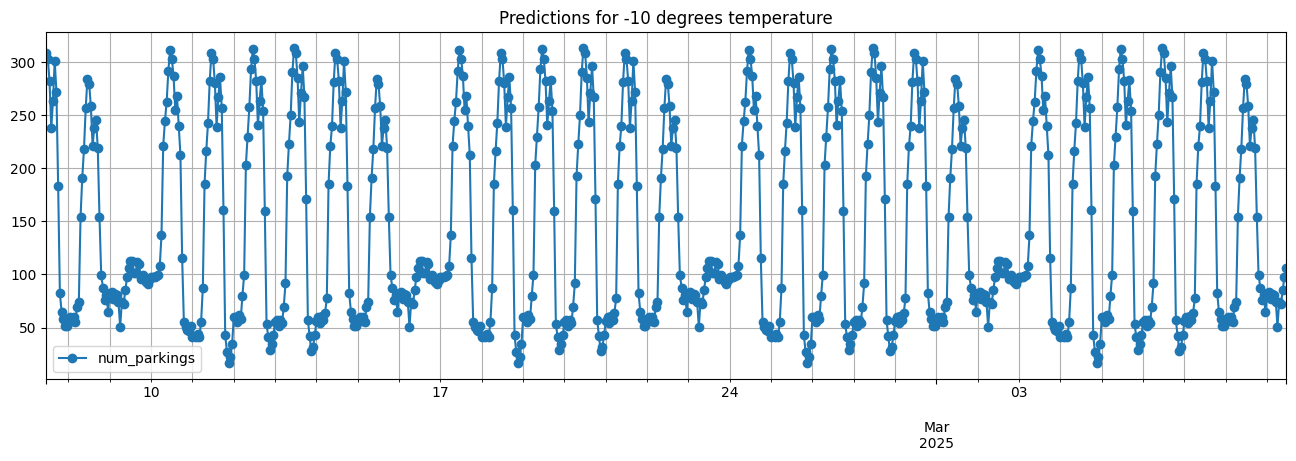

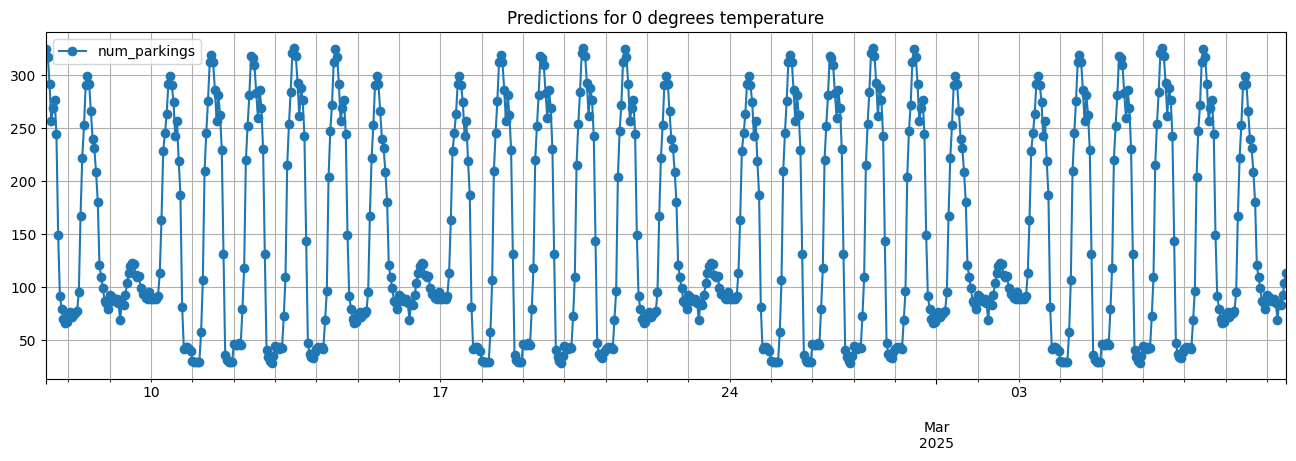

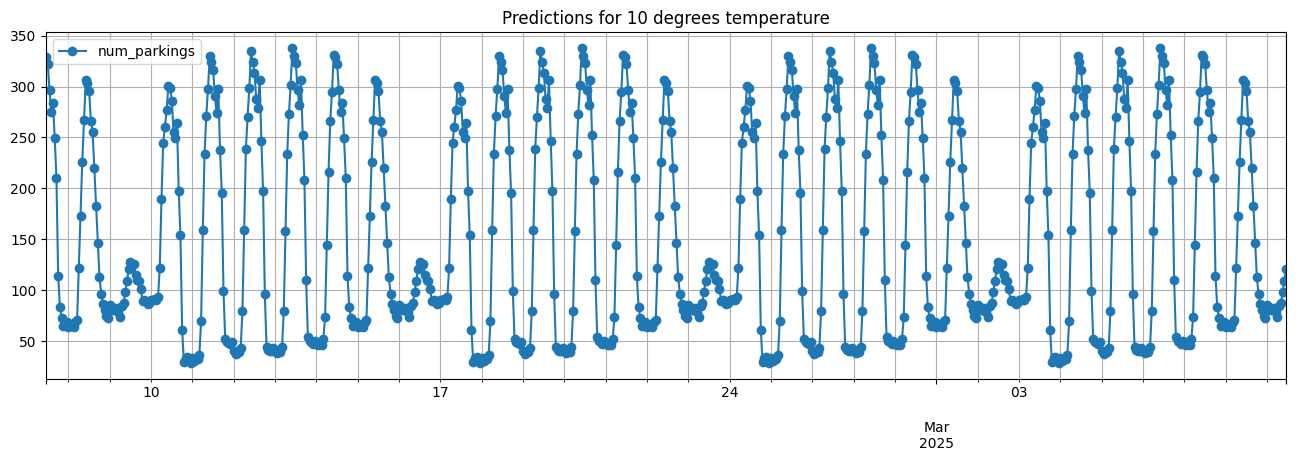

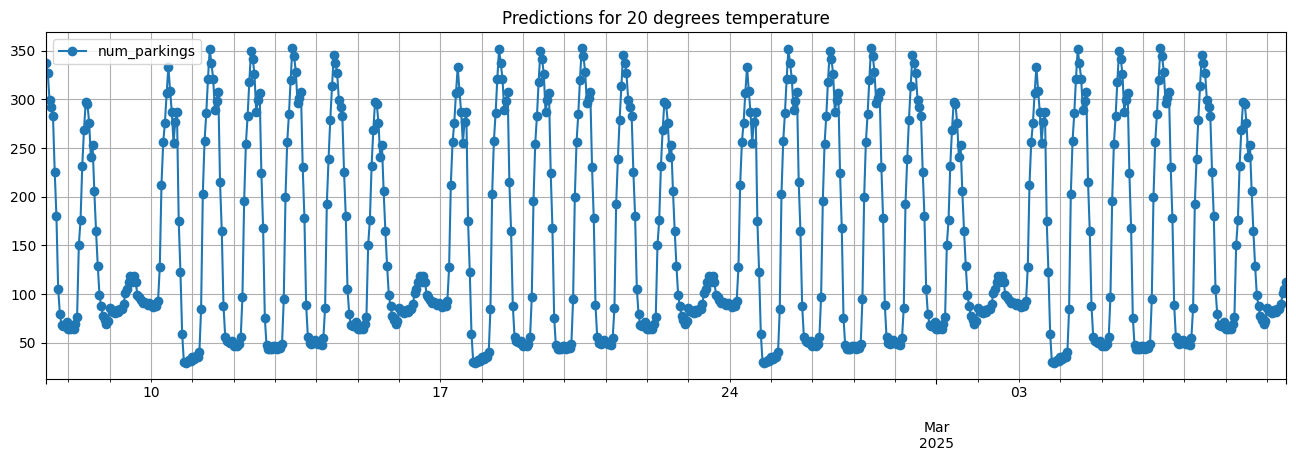

In [4]:
results = {}
date_range = pd.date_range(start="2025-02-07 11:00:00", end="2025-03-09 11:00:00", freq="h")
results[BASE] = predict(pipeline, date_range)
results[RAIN] = predict(pipeline_rain, date_range, rain=RAIN_VALUE)
results[RAIN_BOOL] = predict(pipeline_rain_bool, date_range, rain=True)
results[DRY_WEATHER] = predict(pipeline_rain, date_range, rain=False)
results[MINUS_20] = predict(pipeline_temperature, date_range, temperature=-20)
results[MINUS_10] = predict(pipeline_temperature, date_range, temperature=-10)
results[ZERO] = predict(pipeline_temperature, date_range, temperature=0)
results[PLUS_10] = predict(pipeline_temperature, date_range, temperature=10)
results[PLUS_20] = predict(pipeline_temperature, date_range, temperature=20)
print_results(date_range, results)
draw_results(results)

## Conclusions
### Model Comparison
Mean squared error (model accuracy):
* Model base: 3625
* Model rain: 3527
* Model rain boolean: 3527
* Model temperature: 3182 
  


### Weather Impact Analysis 
Weather impace was measured by forecasting 30 days in future with given static weather values.  Forecast total cars is a sum of all hourly cars in the 30 day period. 
| Condition                          | Forecast  | Difference to Base | Percentage Change |
|------------------------------------|-----------|---------------------|------------------|
| Base Forecast                     | 96,380    | -                   | -                |
| Rain                               | 94,812    | -1,568              | -1.63%           |
| Rain (Boolean)                     | 119,945   | +23,565             | +24.45%          |
| Dry Weather                        | 102,448   | +6,068              | +6.30%           |
| -20°C Temperature                  | 107,903   | +11,523             | +11.96%          |
| -10°C Temperature                  | 105,316   | +8,936              | +9.27%           |
| 0°C Temperature                    | 107,215   | +10,835             | +11.24%          |
| 10°C Temperature                   | 108,618   | +12,238             | +12.70%          |
| 20°C Temperature                   | 110,497   | +14,117             | +14.65%          |
### Key Insights
1. **Rain Impact**  
- Regular rain slightly decreases parking demand by **1.63%** (-1,568 parkings).  
- However, when rain is considered as a **boolean factor**, the forecast **jumps by 24.45%** (+23,565 parkings), indicating possible inconsistencies in the model or a significant nonlinear effect.  

2. **Dry Weather Effect**  
- In dry weather, parking demand **increases by 6.3%** (+6,068 parkings), suggesting that people may prefer driving more when conditions are clear.  

3. **Temperature Trends**  
- **Colder temperatures (-20°C, -10°C, 0°C)** increase parking demand, with a peak at **-20°C (+11.96%)**.  
- **Warmer temperatures (10°C, 20°C)** also lead to increased parking demand, with the highest increase at **20°C (+14.65%)**.  

4. **Overall Temperature Effect**  
- Parking demand consistently **rises as temperatures deviate from 0°C**, both in extreme cold and warm conditions.  
- This may indicate that extreme weather (cold or hot) influences people to use personal vehicles more often.  


